In [127]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dat200-ca5-2023/sample_submission.csv
/kaggle/input/dat200-ca5-2023/train.csv
/kaggle/input/dat200-ca5-2023/test.csv


In [128]:
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split



In [129]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel, RFECV
from sklearn.svm import LinearSVC
from sklearn.impute import KNNImputer


import matplotlib.pyplot as plt
import seaborn as sns



### DATA CLEANING

In [130]:
raw_train = pd.read_csv("/kaggle/input/dat200-ca5-2023/train.csv", index_col=0)
raw_test = pd.read_csv("/kaggle/input/dat200-ca5-2023/test.csv", index_col =0)

In [131]:
raw_train

,Capsaicin level,Pungent odor,Vitamin C,Water,Light transmittance,Temp storage,Time storage,Dihydrocapsaicin level,Fibre density,Protein density,Saturated fatty acids,Monounsaturated fatty acids,Polyunsaturated fatty acids,Scoville score
0,166.7,6.8,0.0,77.95,32.4,7.5,4.0,32.4,13.56,1.05,24.47,0.67,0.41,4051080.0
1,170.4,5.7,0.0,74.06,39.0,4.7,52.0,47.1,8.58,0.93,22.42,1.10,0.22,4258252.0
2,212.5,3.1,0.0,88.27,22.4,5.9,1.0,161.7,13.57,1.02,22.15,4.08,0.50,2678566.0
3,216.0,1.0,0.0,80.01,22.4,6.4,31.0,10.2,21.27,0.98,19.82,0.57,0.04,801070.0
4,146.5,1.3,141.0,78.64,28.8,4.6,38.0,20.7,5.83,0.96,23.95,0.54,0.32,2680508.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,148.1,5.5,0.0,71.90,35.4,6.9,38.0,10.2,17.44,0.99,16.95,1.68,0.10,1429060.0
614,120.9,1.0,125.1,71.62,36.3,8.1,38.0,14.8,27.63,1.10,15.79,6.36,1.86,2582749.0
615,82.0,1.0,125.2,76.20,33.9,8.0,37.0,50.8,12.88,1.01,16.52,0.55,0.29,2022090.0
616,277.9,3.6,0.0,79.05,32.7,4.7,34.0,20.7,6.05,0.92,13.57,1.36,0.58,4271200.0


In [132]:
X = raw_train.drop("Scoville score", axis =1)
y = raw_train["Scoville score"]

X_f = raw_test.copy()


In [133]:
X


,Capsaicin level,Pungent odor,Vitamin C,Water,Light transmittance,Temp storage,Time storage,Dihydrocapsaicin level,Fibre density,Protein density,Saturated fatty acids,Monounsaturated fatty acids,Polyunsaturated fatty acids
0,166.7,6.8,0.0,77.95,32.4,7.5,4.0,32.4,13.56,1.05,24.47,0.67,0.41
1,170.4,5.7,0.0,74.06,39.0,4.7,52.0,47.1,8.58,0.93,22.42,1.10,0.22
2,212.5,3.1,0.0,88.27,22.4,5.9,1.0,161.7,13.57,1.02,22.15,4.08,0.50
3,216.0,1.0,0.0,80.01,22.4,6.4,31.0,10.2,21.27,0.98,19.82,0.57,0.04
4,146.5,1.3,141.0,78.64,28.8,4.6,38.0,20.7,5.83,0.96,23.95,0.54,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,148.1,5.5,0.0,71.90,35.4,6.9,38.0,10.2,17.44,0.99,16.95,1.68,0.10
614,120.9,1.0,125.1,71.62,36.3,8.1,38.0,14.8,27.63,1.10,15.79,6.36,1.86
615,82.0,1.0,125.2,76.20,33.9,8.0,37.0,50.8,12.88,1.01,16.52,0.55,0.29
616,277.9,3.6,0.0,79.05,32.7,4.7,34.0,20.7,6.05,0.92,13.57,1.36,0.58


In [134]:
print(f'Shape: {X.shape}')
print(f'Shape: {y.shape}')
print(f'Shape: {X_f.shape}')

Shape: (618, 13)
Shape: (618,)
Shape: (412, 13)


In [135]:
X.isna().sum()
X_f.isna().sum()

Capsaicin level                0
Pungent odor                   0
Vitamin C                      0
Water                          0
Light transmittance            0
Temp storage                   0
Time storage                   0
Dihydrocapsaicin level         0
Fibre density                  0
Protein density                0
Saturated fatty acids          0
Monounsaturated fatty acids    0
Polyunsaturated fatty acids    0
dtype: int64

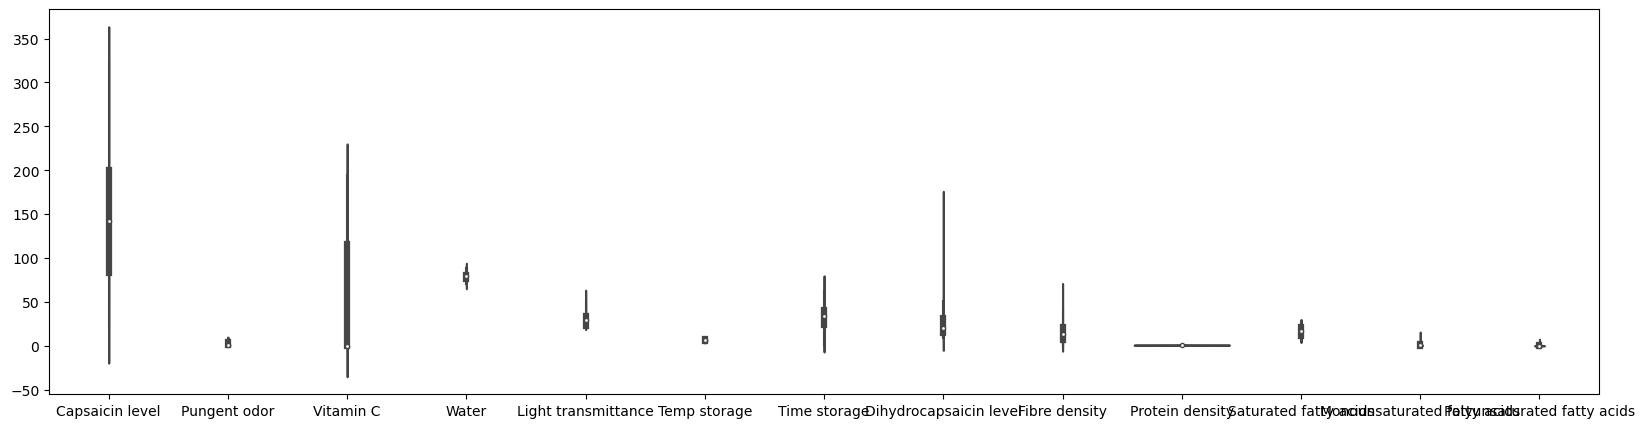

In [136]:
plt.figure(figsize=(20,5))
sns.violinplot(X)
plt.show()

In [137]:
#sns.pairplot(raw_train, hue="Scoville score")


<AxesSubplot:>

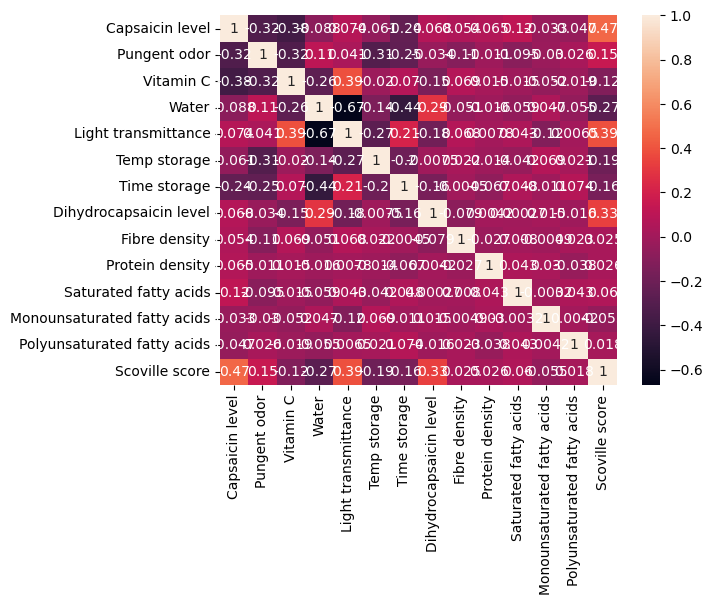

In [138]:
sns.heatmap(raw_train.corr(), annot=True)


In [139]:
X_f

,Capsaicin level,Pungent odor,Vitamin C,Water,Light transmittance,Temp storage,Time storage,Dihydrocapsaicin level,Fibre density,Protein density,Saturated fatty acids,Monounsaturated fatty acids,Polyunsaturated fatty acids
0,134.1,3.5,0.0,88.27,22.4,5.9,15.0,161.7,20.15,0.93,23.19,0.51,0.07
1,200.6,5.2,0.0,75.87,35.9,6.0,30.0,11.9,5.16,0.94,14.32,0.10,0.04
2,219.3,5.2,0.0,72.14,48.0,6.0,30.0,20.7,3.92,0.96,7.94,3.14,0.29
3,200.6,5.2,0.0,75.87,35.9,6.0,30.0,10.2,18.17,0.92,23.31,0.71,0.19
4,50.9,1.0,179.0,83.16,31.7,4.3,50.0,20.7,16.84,0.91,11.55,1.65,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,98.0,1.0,174.2,74.75,36.0,7.5,33.0,14.8,3.31,0.92,24.90,1.95,0.07
408,70.1,3.6,0.0,81.19,22.4,6.1,48.0,11.9,9.60,1.00,17.77,0.16,0.35
409,138.8,3.3,81.8,84.67,32.9,5.5,16.0,20.7,3.94,0.94,7.28,0.14,3.22
410,243.5,3.4,0.0,73.63,41.6,4.7,53.0,47.1,16.12,1.17,13.38,3.46,0.48


In [140]:

# plt.figure(figsize=(20,5))
# sns.violinplot(z)
# plt.show()

In [141]:
# plt.figure(figsize=(20,5))
# sns.violinplot(X)
# plt.show()

In [142]:
# corr = X.corr()
# mask = np.triu(corr)

# plt.figure(figsize=(20,20))
# sns.heatmap(corr, mask=mask, annot=True, cmap="Blues")
# plt.show()

### PREPROCESSING

In [143]:
# Feature Selection

X1 = X.drop(["Fibre density","Protein density","Saturated fatty acids","Monounsaturated fatty acids","Polyunsaturated fatty acids"], axis =1)
X1

,Capsaicin level,Pungent odor,Vitamin C,Water,Light transmittance,Temp storage,Time storage,Dihydrocapsaicin level
0,166.7,6.8,0.0,77.95,32.4,7.5,4.0,32.4
1,170.4,5.7,0.0,74.06,39.0,4.7,52.0,47.1
2,212.5,3.1,0.0,88.27,22.4,5.9,1.0,161.7
3,216.0,1.0,0.0,80.01,22.4,6.4,31.0,10.2
4,146.5,1.3,141.0,78.64,28.8,4.6,38.0,20.7
...,...,...,...,...,...,...,...,...
613,148.1,5.5,0.0,71.90,35.4,6.9,38.0,10.2
614,120.9,1.0,125.1,71.62,36.3,8.1,38.0,14.8
615,82.0,1.0,125.2,76.20,33.9,8.0,37.0,50.8
616,277.9,3.6,0.0,79.05,32.7,4.7,34.0,20.7


In [144]:
X2 = X_f.drop(["Fibre density","Protein density","Saturated fatty acids","Monounsaturated fatty acids","Polyunsaturated fatty acids"], axis =1)
X2

,Capsaicin level,Pungent odor,Vitamin C,Water,Light transmittance,Temp storage,Time storage,Dihydrocapsaicin level
0,134.1,3.5,0.0,88.27,22.4,5.9,15.0,161.7
1,200.6,5.2,0.0,75.87,35.9,6.0,30.0,11.9
2,219.3,5.2,0.0,72.14,48.0,6.0,30.0,20.7
3,200.6,5.2,0.0,75.87,35.9,6.0,30.0,10.2
4,50.9,1.0,179.0,83.16,31.7,4.3,50.0,20.7
...,...,...,...,...,...,...,...,...
407,98.0,1.0,174.2,74.75,36.0,7.5,33.0,14.8
408,70.1,3.6,0.0,81.19,22.4,6.1,48.0,11.9
409,138.8,3.3,81.8,84.67,32.9,5.5,16.0,20.7
410,243.5,3.4,0.0,73.63,41.6,4.7,53.0,47.1


In [145]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=1234)


In [146]:
y_train

95     1508044.0
542    1991014.0
78     1482148.0
59     3342811.0
189    2424780.0
         ...    
279    3384245.0
372    3528618.0
204    2583396.0
53     2955011.0
294    4620803.0
Name: Scoville score, Length: 494, dtype: float64

In [147]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(124, 8)
(494, 8)
(124,)
(494,)


In [148]:
#SCALING OF DATA

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [149]:
#X_test

In [150]:
# Random Forest Base Model
clf = RandomForestClassifier(n_estimators=500, max_depth=12, random_state=1234)
#clf = RandomForestClassifier(n_estimators=10000, max_depth=50, min_samples_split=5, min_samples_leaf=5, max_features=2, bootstrap=True, random_state=1234)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))


Accuracy:  0.06451612903225806


In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Binning the target variable into 10 equal-sized bins
n_bins = 2
y_binned = pd.cut(y, n_bins, labels=False)

# Split the data into training and test sets
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X1, y_binned, test_size=0.2, random_state=1234)

# Create a Random Forest classifier with some initial parameters
#clf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=5, min_samples_leaf=5, max_features='sqrt', bootstrap=True, random_state=1234)
clf = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=1234)


# Train the classifier on the training data
clf.fit(X_train_bin, y_train_bin)

# Make predictions on the test data
y_pred_bin = clf.predict(X_test_bin)

# Evaluate the performance of the model using accuracy score
accuracy = accuracy_score(y_test_bin, y_pred_bin)
print('Accuracy:', accuracy)


#the lesser the number of bins the greater the accuracy score and vice- versa

Accuracy: 0.8790322580645161


In [152]:
y_train

95     1508044.0
542    1991014.0
78     1482148.0
59     3342811.0
189    2424780.0
         ...    
279    3384245.0
372    3528618.0
204    2583396.0
53     2955011.0
294    4620803.0
Name: Scoville score, Length: 494, dtype: float64

In [153]:
# # Binning the target variable into 10 equal-sized bins
# n_bins = 2
# y_binned = pd.cut(y, n_bins, labels=False)

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X1, y_binned, test_size=0.2, random_state=1234)


# X1, y = make_regression(n_features=4, n_informative=2,
#                         random_state=0, shuffle=False) regr = RandomForestRegressor(max_depth=2, random_state=0)
#  regr.fit(X, y)
# RandomForestRegressor(...)

from sklearn.metrics import mean_absolute_error

# Define the random forest regressor model
rf = RandomForestRegressor()

# Define the grid search parameters
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform grid search with cross-validation
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, scoring = 'neg_mean_absolute_error'
, cv=5)
grid_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = grid_rf.predict(X_test)

# Evaluate the performance of the model using accuracy score
#accuracy = accuracy_score(y_test, y_pred)
error = mean_absolute_error(y_test, y_pred)
print('Accuracy:', accuracy)
print('MAE:', error)

# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best Hyperparameters: ", grid_rf.best_params_)
print("Best Score: ", grid_rf.best_score_)


Accuracy: 0.8790322580645161
MAE: 245625.65430241937
Best Hyperparameters:  {'max_depth': None, 'max_features': 'auto', 'n_estimators': 100}
Best Score:  -296744.2196383745


In [154]:


rf = RandomForestRegressor()

# Define the grid search parameters
param_grid = {
    'n_estimators': [100],
    'max_depth': [None],
    'max_features': ['log2']
}

# Perform grid search with cross-validation
grid_rf1 = GridSearchCV(estimator=rf, param_grid=param_grid, scoring = 'neg_mean_absolute_error'
, cv=5)
grid_rf1.fit(X_train, y_train)

# Make predictions on the test data
y_pred = grid_rf1.predict(X_test)

error = mean_absolute_error(y_test, y_pred)
print('Accuracy:', accuracy)
print('MAE:', error)

# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best Hyperparameters: ", grid_rf1.best_params_)
print("Best Score: ", grid_rf1.best_score_)



Accuracy: 0.8790322580645161
MAE: 263630.8787077573
Best Hyperparameters:  {'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}
Best Score:  -302566.3425885659


In [176]:
X2

,Capsaicin level,Pungent odor,Vitamin C,Water,Light transmittance,Temp storage,Time storage,Dihydrocapsaicin level
0,134.1,3.5,0.0,88.27,22.4,5.9,15.0,161.7
1,200.6,5.2,0.0,75.87,35.9,6.0,30.0,11.9
2,219.3,5.2,0.0,72.14,48.0,6.0,30.0,20.7
3,200.6,5.2,0.0,75.87,35.9,6.0,30.0,10.2
4,50.9,1.0,179.0,83.16,31.7,4.3,50.0,20.7
...,...,...,...,...,...,...,...,...
407,98.0,1.0,174.2,74.75,36.0,7.5,33.0,14.8
408,70.1,3.6,0.0,81.19,22.4,6.1,48.0,11.9
409,138.8,3.3,81.8,84.67,32.9,5.5,16.0,20.7
410,243.5,3.4,0.0,73.63,41.6,4.7,53.0,47.1


In [155]:
y_pred = grid_rf.predict(X2)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [182]:
y_pred = RandomForestRegressor().fit(X1, y).predict(X2)

In [183]:
np.unique(y_pred)

array([ 219648.43      ,  322541.64      ,  345026.23      ,
        365704.54      ,  416429.3       ,  470863.88      ,
        476768.33      ,  512738.44      ,  521193.61      ,
        532083.22      ,  532206.22      ,  550670.38      ,
        559585.15      ,  580561.83      ,  584491.095     ,
        623879.81      ,  632153.69      ,  634206.06      ,
        640783.64      ,  644700.62      ,  650824.98      ,
        651019.54      ,  651906.3       ,  665456.72      ,
        668965.58      ,  673445.87      ,  676572.87      ,
        678832.06      ,  689728.05      ,  699083.45      ,
        707279.47      ,  718803.41      ,  729446.91      ,
        732819.98      ,  739125.74      ,  748001.76      ,
        753420.64      ,  766653.56      ,  768641.04      ,
        784826.31      ,  787862.655     ,  788905.25      ,
        790925.21      ,  796026.61      ,  800623.35      ,
        817546.69      ,  828947.66      ,  828973.51      ,
        832184.69      ,

In [184]:
pred_df = pd.DataFrame({"Id": raw_test.index, "Scoville score": y_pred})
# pred_df.reset_index(inplace=True)
pred_df["Scoville score"].nunique()

398

In [185]:
pred_df.to_csv("submission.csv", index=False)

In [158]:
# base_model = RandomForestClassifier(n_estimators=50, random_state=123)

# # selected_cols = [x for x, v in zip(X.columns, sfm.get_support()) if v]
# # print(f'Count : {len(selected_cols)}')
# # print(f'{selected_cols}')
# # cv = StratifiedShuffleSplit(n_splits=5, random_state=123)


# # base_model = RandomForestClassifier(n_estimators=50, random_state=123)
# # sfm = SelectFromModel(estimator=base_model, threshold="median")
# # sfm.fit(X_train, y_train)

# # selected_cols = [x for x, v in zip(X.columns, sfm.get_support()) if v]
# # print(f'Count : {len(selected_cols)}')
# # print(f'{selected_cols}')
# # cv = StratifiedShuffleSplit(n_splits=5, random_state=123)




# rfe = RFECV(estimator=base_model, min_features_to_select=6, cv=5)
# rfe.fit(X_train, y_train)

# selected_cols = [x for x, v in zip(X.columns, rfe.get_support()) if v]
# print(f'Count : {len(selected_cols)}')
# print(f'{selected_cols}')



# from sklearn.metrics import accuracy_score

# y_pred = rfe.predict(X_test)
# print(accuracy_score(y_test, y_pred))


In [159]:
# # Train random forest classifier
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)


In [160]:
#rf.score(X_test,y_test)

In [161]:
# # Create a pipeline with preprocessing steps and a regression model
# # Data pipeline with regression model


# pipe = Pipeline([
#     ('scaler', StandardScaler()),
#     ('regressor', LinearRegression())
# ])

# # Fit the pipeline on the training data
# pipe.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = pipe.predict(X_test)

# print("Accuracy:", pipe.score(X_test, y_test))


In [162]:
# # Bin the target values into 10 equal-sized bins
# y_binned = pd.qcut(y, 10, labels=False)

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2)

# # Create a random forest classifier
# clf = RandomForestClassifier()

# # Train the classifier on the binned target values
# clf.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = clf.predict(X_test)


# n_bins = 10
# y_train_binned = pd.cut(y_train, n_bins, labels=False) # or
# y_train_binned = pd.qcut(y_train, n_bins, labels=False) 


In [163]:
# lr_pipe = Pipeline([
#     ('scaler', StandardScaler()),
#     ('pca', PCA()),
#     ('lr', LogisticRegression(penalty='l1', solver='liblinear'))
# ])
# # lr_pipe.get_params()
# lr_param_grid = {
#     'pca__n_components': [2, 3, 4],
#     'lr__C': [0.1, 1, 10, 100],
#      'lr__max_iter': [1000]
# }

# ## Create a GridSearchCV object to search over the hyperparameters
# lr_grid = GridSearchCV(lr_pipe, 
#                        param_grid= lr_param_grid, 
#                        cv=3,
#                         scoring = "f1_macro",
#                        return_train_score=True )
    
# lr_grid.fit(X_train, y_train)


In [164]:
#lr_grid.score(X_test, y_test